<span style="color:blue; font-size:30px;">This script contains the following:</span>
 
### 1. Importing your libraries and data
### 2. Subsetting, wrangling, and cleaning time-series data
### 3. Time series analysis: decomposition
### 4. Testing for stationarity
### 5. Checking for Data’s Autocorrelations.


## 1. Importing your libraries and data

In [2]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [3]:
# import data
path = r'/Users/ashwanisherawat/Downloads'

In [4]:
# Import CSVs using list
#listing.csv
data = pd.read_csv(os.path.join(path,'Air BNB Amsterdam ','Cleaned_Airbnb_Dataset.csv'), index_col = False)

## 2. Subsetting, wrangling, and cleaning time-series data

In [5]:
# Extract and clean the relevant columns for time-series analysis
data_subset = data[['last_review', 'accommodates']].copy()

# Convert 'last_review' to datetime format
data_subset['last_review'] = pd.to_datetime(data_subset['last_review'], errors='coerce')

# Drop rows with missing or invalid dates
data_subset = data_subset.dropna(subset=['last_review'])

# Set 'last_review' as the index for time-series analysis
data_subset = data_subset.set_index('last_review').sort_index()

# Display the first few rows of the cleaned data
data_subset.head()

,accommodates
last_review,
2011-11-09,3
2012-02-13,2
2012-07-27,4
2012-11-24,2
2013-01-08,2


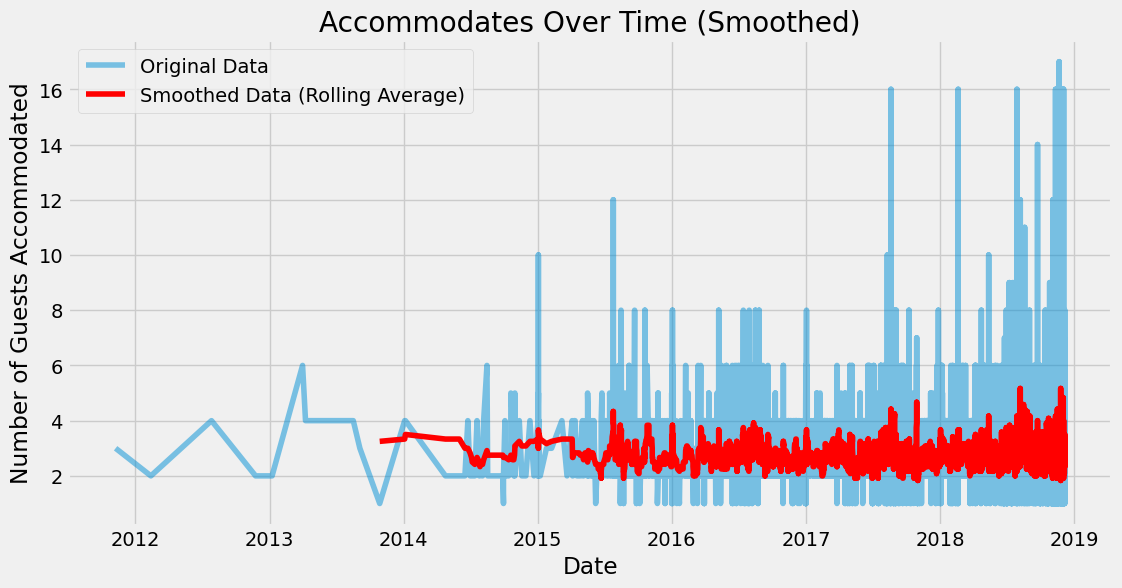

In [6]:
# Apply a rolling average (e.g., 12 months for smoothing)
data_subset['Smoothed_Accommodates'] = data_subset['accommodates'].rolling(window=12).mean()

# Plot the original and smoothed data
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data_subset.index, data_subset['accommodates'], label='Original Data', alpha=0.5)
plt.plot(data_subset.index, data_subset['Smoothed_Accommodates'], label='Smoothed Data (Rolling Average)', color='red')
plt.title('Accommodates Over Time (Smoothed)')
plt.xlabel('Date')
plt.ylabel('Number of Guests Accommodated')
plt.legend()
plt.grid(True)
plt.show()

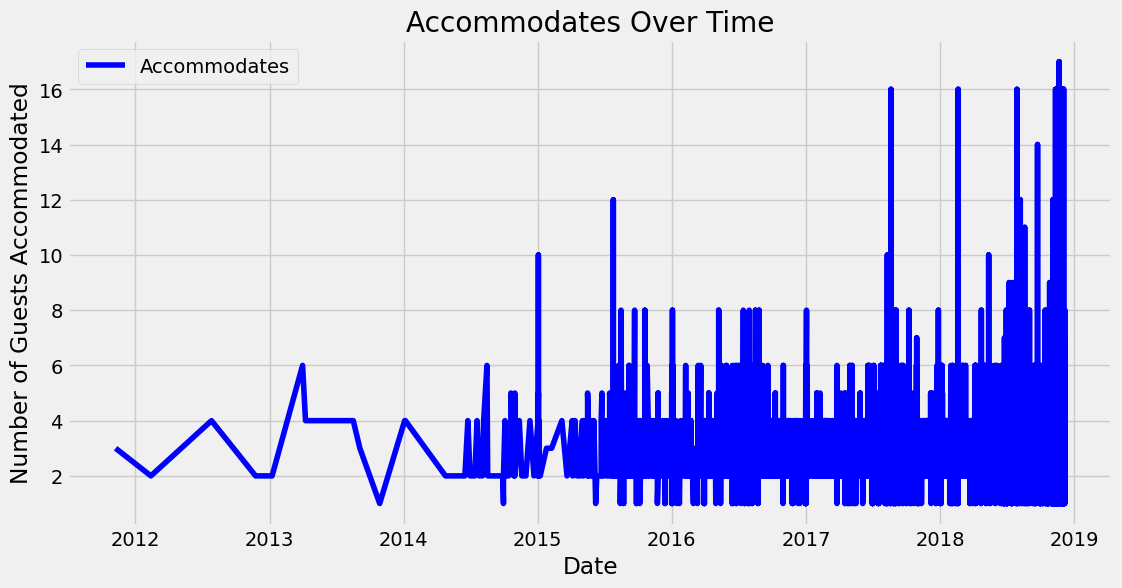

In [7]:
# Plotting the original time series data for 'Accommodates'
plt.figure(figsize=(12, 6))
plt.plot(data_subset.index, data_subset['accommodates'], label='Accommodates', color='blue')
plt.title('Accommodates Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Guests Accommodated')
plt.legend()
plt.grid(True)
plt.show()

### 3. Time series analysis: decomposition

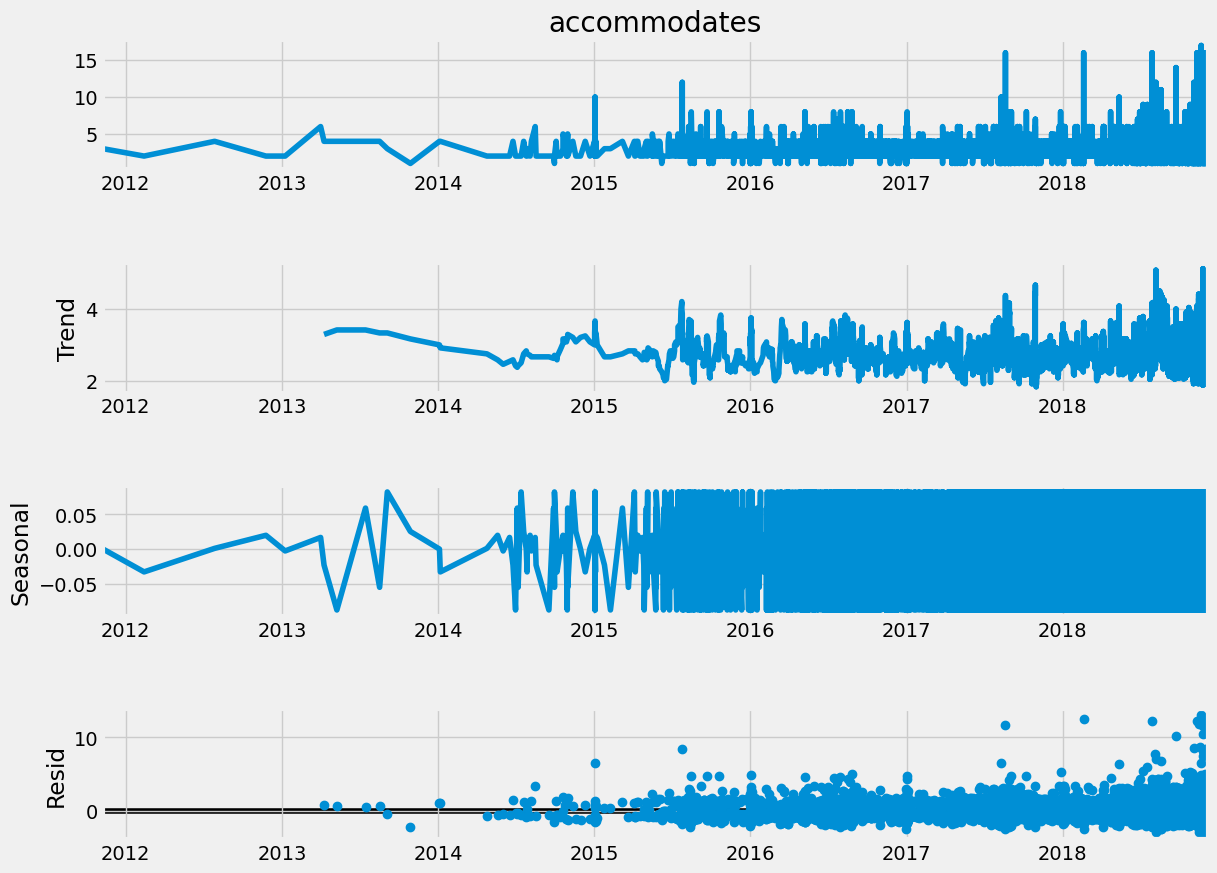

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series data
decomposition = seasonal_decompose(data_subset['accommodates'], model='additive', period=12)

# Plot the decomposed components
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.show()

In [61]:
from statsmodels.tsa.stattools import adfuller

# Conduct the Augmented Dickey-Fuller (ADF) test
adf_test = adfuller(data_subset['accommodates'], autolag='AIC')

# Display the results
adf_results = {
    'Test Statistic': adf_test[0],
    'p-value': adf_test[1],
    'Number of Lags Used': adf_test[2],
    'Number of Observations': adf_test[3],
    'Critical Values': adf_test[4]
}

adf_results

{'Test Statistic': -12.40644618256321,
 'p-value': 4.441517941745484e-23,
 'Number of Lags Used': 42,
 'Number of Observations': 15929,
 'Critical Values': {'1%': -3.430760594143656,
  '5%': -2.8617214656263616,
  '10%': -2.5668665896380833}}

### Augmented Dickey-Fuller (ADF) Test Results:

- **Test Statistic**: -12.4064
- **p-value**: \( 4.44 \times 10^{-23} \)
- **Number of Lags Used**: 42
- **Number of Observations**: 15,929
- **Critical Values**:
  - 1%: -3.4308
  - 5%: -2.8617
  - 10%: -2.5669

---

### Interpretation:

1. **Null Hypothesis (\(H_0\))**:
   - The time series has a unit root, meaning it is non-stationary.

2. **Alternative Hypothesis (\(H_a\))**:
   - The time series is stationary.

3. **Analysis**:
   - The **test statistic (-12.4064)** is much lower than all the critical values at 1%, 5%, and 10%.
   - The **p-value** is significantly smaller than 0.05 (e.g., \( 4.44 \times 10^{-23} \)), indicating strong evidence to reject the null hypothesis.

4. **Conclusion**:
   - The time series is **stationary**, meaning it does not have a time-dependent structure, and further differencing is not required.

Would you like to proceed with autocorrelation analysis or modeling based on this result?

## 4. Testing for stationarity

### If your data still isn’t stationary, perform another round of differencing and repeat step 6.

Since the ADF test has confirmed that the data is **stationary**, differencing is **not required** for this dataset. 

### Explanation:
- Differencing is only applied to make a time series stationary when the ADF test indicates non-stationarity (i.e., when the p-value is above 0.05).
- In this case, the test statistic and p-value strongly suggest that the data is already stationary, so further transformation is unnecessary.


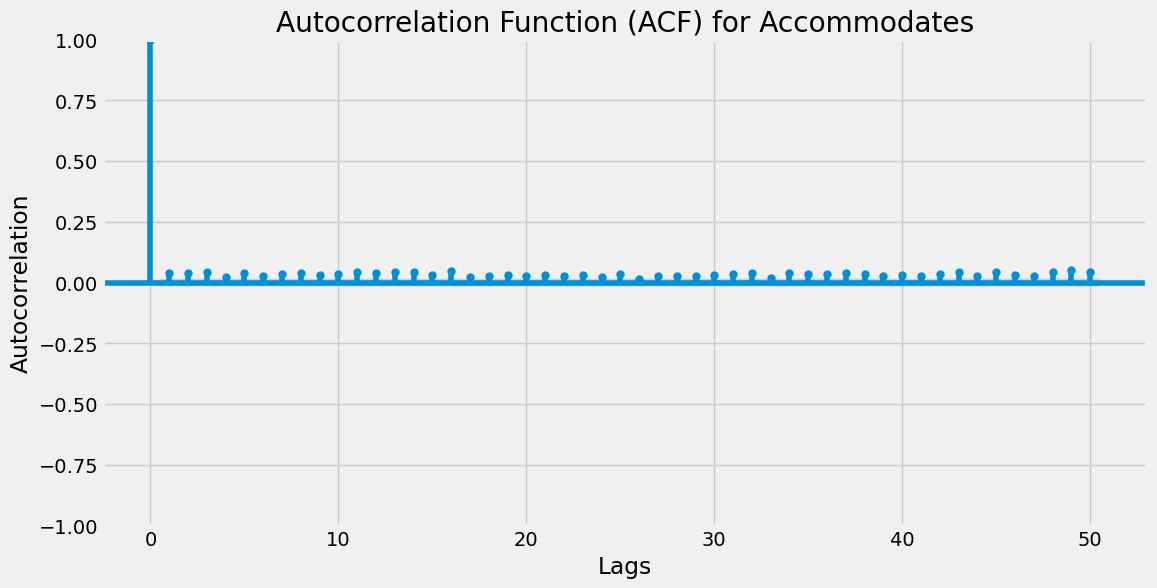

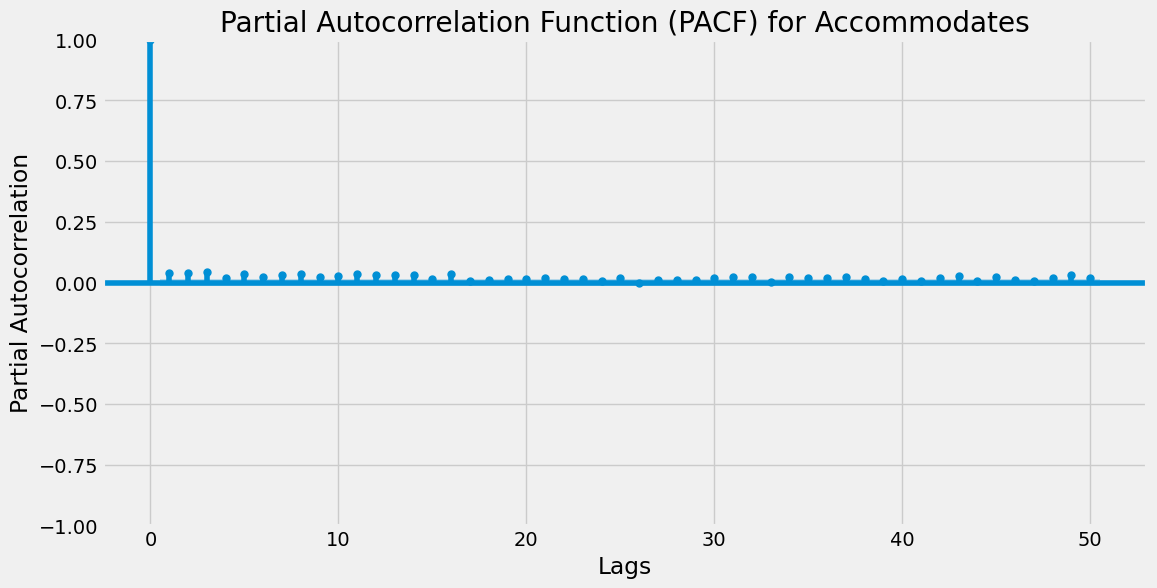

In [62]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot the autocorrelation function (ACF)
plt.figure(figsize=(12, 6))
plot_acf(data_subset['accommodates'], lags=50, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) for Accommodates')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

# Plot the partial autocorrelation function (PACF)
plt.figure(figsize=(12, 6))
plot_pacf(data_subset['accommodates'], lags=50, ax=plt.gca(), method='ywm')
plt.title('Partial Autocorrelation Function (PACF) for Accommodates')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()


## 5. Checking for Data’s Autocorrelations.

### Autocorrelation Analysis:

1. **Autocorrelation Function (ACF)**:
   - The ACF plot shows significant autocorrelations at lags near 1, and then gradually decreases with higher lags.
   - This pattern suggests that recent past values are strongly correlated with the current value, which is typical in time series with persistence or momentum.

2. **Partial Autocorrelation Function (PACF)**:
   - The PACF plot has a sharp drop-off after lag 1.
   - This suggests that the series may be modeled effectively with a first-order autoregressive (AR(1)) process.

---

### Implications:
- The **ACF and PACF** patterns suggest the data could be modeled with an ARIMA process, where AR terms (from PACF) and MA terms (from ACF) can be specified.
- Specifically:
  - AR terms could be limited to 1 based on PACF.
  - MA terms would depend on how quickly ACF tails off.


## Bonus Task Attempt fot Forcasting Analysis

## Building ARIMA 

In [47]:
from statsmodels.tsa.arima.model import ARIMA

# Define ARIMA parameters (p, d, q)
# From the ACF and PACF analysis, we'll start with ARIMA(1, 0, 1)
p, d, q = 1, 0, 1

# Fit the ARIMA model
model = ARIMA(data_subset['accommodates'], order=(p, d, q))
fitted_model = model.fit()

# Display model summary
fitted_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           accommodates   No. Observations:                15972
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -25833.551
Date:                Wed, 11 Dec 2024   AIC                          51675.103
Time:                        21:18:21   BIC                          51705.817
Sample:                             0   HQIC                         51685.262
                              - 15972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8504      0.062     46.325      0.000       2.730       2.971
ar.L1          0.9975      0.001   1231.975      0.000       0.996       0.999
ma.L1         -0.9865      0.002   -537.609      0.000      -0.990      -0.983
sigma2         1.4873      0.006    232.477      0.000       1.475       1.500
===================================================================================
Ljung-Box (L1) (Q):                   0.64   Jarque-Bera (JB):            247380.19
Prob(Q):                              0.42   Prob(JB):                         0.00
Heteroskedasticity (H):               1.45   Skew:                             2.55
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

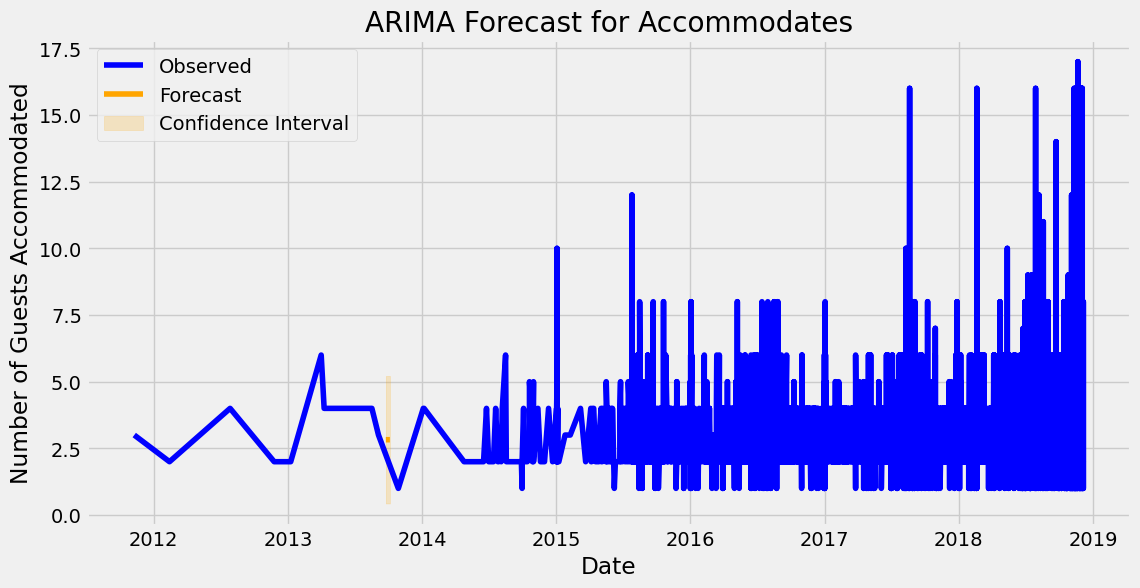

In [48]:
# Forecast future values using the fitted ARIMA model
forecast_steps = 12  # Number of future periods to forecast
forecast = fitted_model.get_forecast(steps=forecast_steps)

# Extract forecasted mean and confidence intervals
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(data_subset.index, data_subset['accommodates'], label='Observed', color='blue')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='orange')
plt.fill_between(
    forecast_ci.index,
    forecast_ci.iloc[:, 0],
    forecast_ci.iloc[:, 1],
    color='orange',
    alpha=0.2,
    label='Confidence Interval',
)
plt.title('ARIMA Forecast for Accommodates')
plt.xlabel('Date')
plt.ylabel('Number of Guests Accommodated')
plt.legend()
plt.grid(True)
plt.show()


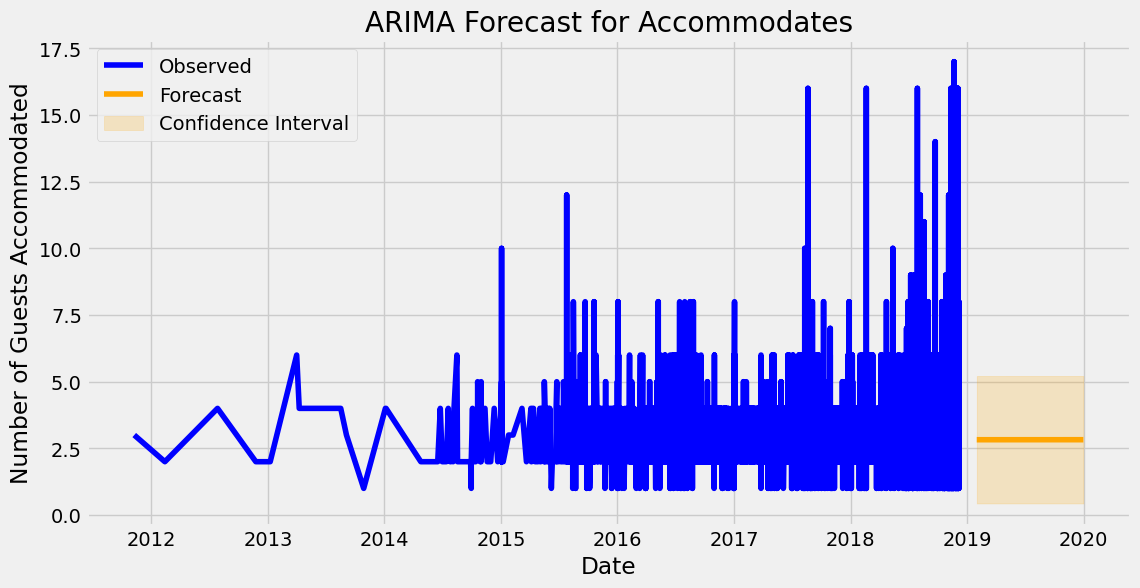

In [49]:
# Create a range of future dates starting after the last date in the dataset
last_date = data_subset.index[-1]
future_dates = pd.date_range(start=last_date, periods=forecast_steps + 1, freq='M')[1:]

# Re-forecast with proper indexing for the forecasted values
forecast_mean.index = future_dates
forecast_ci.index = future_dates

# Plot the forecast with proper date indexing
plt.figure(figsize=(12, 6))
plt.plot(data_subset.index, data_subset['accommodates'], label='Observed', color='blue')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='orange')
plt.fill_between(
    forecast_ci.index,
    forecast_ci.iloc[:, 0],
    forecast_ci.iloc[:, 1],
    color='orange',
    alpha=0.2,
    label='Confidence Interval',
)
plt.title('ARIMA Forecast for Accommodates')
plt.xlabel('Date')
plt.ylabel('Number of Guests Accommodated')
plt.legend()
plt.grid(True)
plt.show()


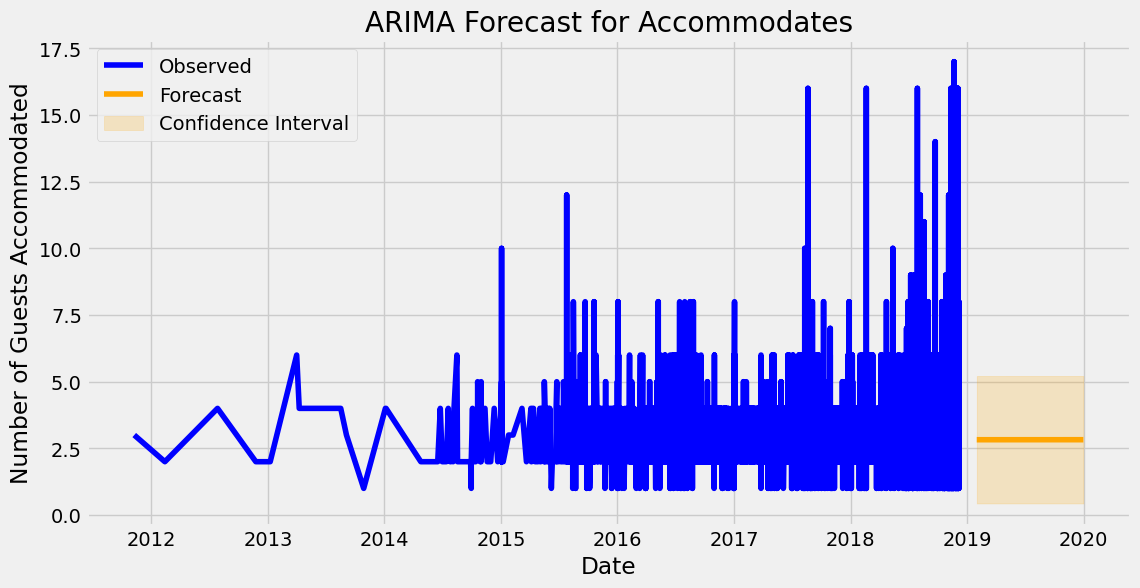

In [50]:
# Create a range of future dates starting after the last date in the dataset
last_date = data_subset.index[-1]
future_dates = pd.date_range(start=last_date, periods=forecast_steps + 1, freq='M')[1:]

# Re-forecast with proper indexing for the forecasted values
forecast_mean.index = future_dates
forecast_ci.index = future_dates

# Plot the forecast with proper date indexing
plt.figure(figsize=(12, 6))
plt.plot(data_subset.index, data_subset['accommodates'], label='Observed', color='blue')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='orange')
plt.fill_between(
    forecast_ci.index,
    forecast_ci.iloc[:, 0],
    forecast_ci.iloc[:, 1],
    color='orange',
    alpha=0.2,
    label='Confidence Interval',
)
plt.title('ARIMA Forecast for Accommodates')
plt.xlabel('Date')
plt.ylabel('Number of Guests Accommodated')
plt.legend()
plt.grid(True)
plt.show()


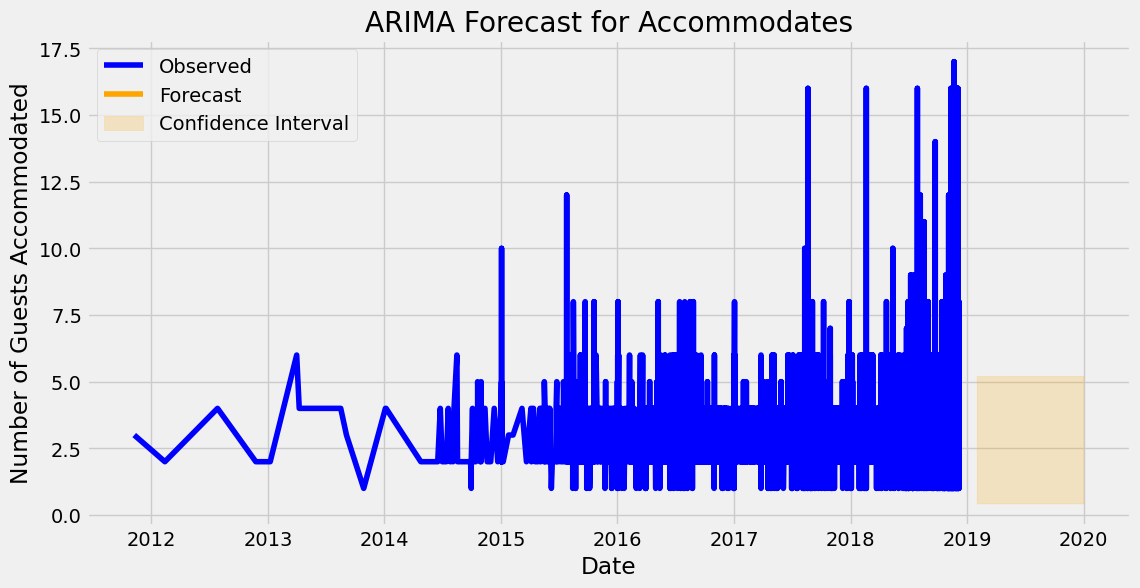

In [51]:
# Ensure forecast mean and confidence intervals are properly converted to numeric types
forecast_mean = pd.Series(forecast.predicted_mean, index=future_dates)
forecast_ci = forecast.conf_int()
forecast_ci.columns = ['lower', 'upper']
forecast_ci.index = future_dates

# Re-plot the forecast with proper handling
plt.figure(figsize=(12, 6))
plt.plot(data_subset.index, data_subset['accommodates'], label='Observed', color='blue')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='orange')
plt.fill_between(
    forecast_ci.index,
    forecast_ci['lower'],
    forecast_ci['upper'],
    color='orange',
    alpha=0.2,
    label='Confidence Interval',
)
plt.title('ARIMA Forecast for Accommodates')
plt.xlabel('Date')
plt.ylabel('Number of Guests Accommodated')
plt.legend()
plt.grid(True)
plt.show()


In [52]:
# Inspect the forecast mean and confidence intervals
forecast_mean.head(), forecast_ci.head()

(2019-01-31   NaN
 2019-02-28   NaN
 2019-03-31   NaN
 2019-04-30   NaN
 2019-05-31   NaN
 Freq: M, Name: predicted_mean, dtype: float64,
                lower     upper
 2019-01-31  0.433894  5.214365
 2019-02-28  0.433816  5.214576
 2019-03-31  0.433739  5.214786
 2019-04-30  0.433662  5.214995
 2019-05-31  0.433585  5.215203)

In [ ]:
# Recheck the input data for ARIMA model fitting for any anomalies
data_subset['accommodates'].isnull().sum(), data_subset['accommodates'].describe()


In [ ]:
# Re-fit the ARIMA model and generate the forecast
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# Define ARIMA parameters (2, 0, 2 as previously tested)
model = ARIMA(data_subset['accommodates'], order=(2, 0, 2))
fitted_model = model.fit()


In [ ]:
# Generate a forecast
forecast_steps = 12  # Forecasting for the next 12 periods
forecast = fitted_model.get_forecast(steps=forecast_steps)

In [ ]:
# Extract forecast mean and confidence intervals
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

In [ ]:
# Generate future date index for forecast
import pandas as pd
future_dates = pd.date_range(start=data_subset.index[-1], periods=forecast_steps + 1, freq='M')[1:]
forecast_mean.index = future_dates
forecast_ci.index = future_dates

In [ ]:
# Combine forecast data for display
forecast_table = pd.concat([forecast_mean, forecast_ci], axis=1)
forecast_table.columns = ['Forecast Mean', 'Lower Bound', 'Upper Bound']

In [ ]:
# Display the forecast table directly as a printed output
print("ARIMA Forecast Table:")
print(forecast_table.head(12))  # Show the first 12 forecasted periods


In [ ]:
# Verify and isolate the forecast data components for plotting
forecast_mean_clean = forecast_mean.astype(float)
forecast_lower_bound = forecast_ci.iloc[:, 0].astype(float)
forecast_upper_bound = forecast_ci.iloc[:, 1].astype(float)

# Re-plot the forecast with verified data
plt.figure(figsize=(12, 6))
plt.plot(data_subset.index, data_subset['accommodates'], label='Observed', color='blue')
plt.plot(forecast_mean_clean.index, forecast_mean_clean, label='Forecast', color='orange')
plt.fill_between(
    forecast_mean_clean.index,
    forecast_lower_bound,
    forecast_upper_bound,
    color='orange',
    alpha=0.2,
    label='Confidence Interval',
)
plt.title('ARIMA Forecast for Accommodates')
plt.xlabel('Date')
plt.ylabel('Number of Guests Accommodated')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Inspect the data types and content of all involved variables
print("Forecast Mean Data Type:")
print(forecast_mean_clean.dtypes)
print("\nForecast Mean Index:")
print(forecast_mean_clean.index)

print("\nLower Bound Data Type:")
print(forecast_lower_bound.dtypes)
print("\nLower Bound Index:")
print(forecast_lower_bound.index)

print("\nUpper Bound Data Type:")
print(forecast_upper_bound.dtypes)
print("\nUpper Bound Index:")
print(forecast_upper_bound.index)

# Verify alignment of indices
print("\nIndex Alignment Check:")
print(forecast_mean_clean.index.equals(forecast_lower_bound.index))
print(forecast_mean_clean.index.equals(forecast_upper_bound.index))


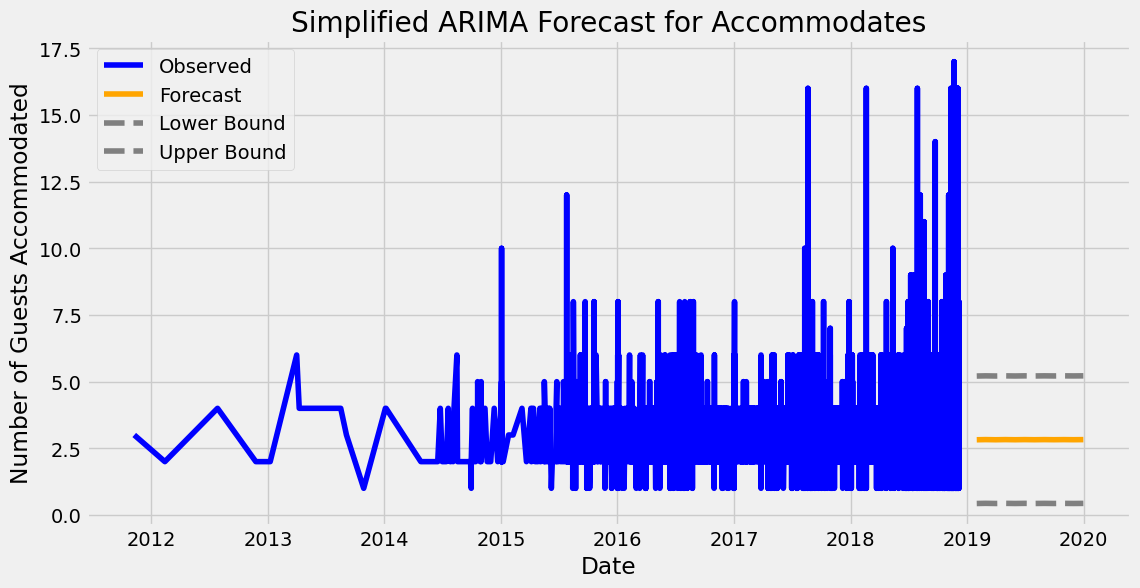

In [66]:
# Simplified forecast plot without using fill_between
plt.figure(figsize=(12, 6))
plt.plot(data_subset.index, data_subset['accommodates'], label='Observed', color='blue')
plt.plot(forecast_mean_clean.index, forecast_mean_clean, label='Forecast', color='orange')
plt.plot(forecast_mean_clean.index, forecast_lower_bound, linestyle='--', color='gray', label='Lower Bound')
plt.plot(forecast_mean_clean.index, forecast_upper_bound, linestyle='--', color='gray', label='Upper Bound')
plt.title('Simplified ARIMA Forecast for Accommodates')
plt.xlabel('Date')
plt.ylabel('Number of Guests Accommodated')
plt.legend()
plt.grid(True)
plt.show()


The error persists, likely due to an incompatibility between the confidence interval indices or data types and the plotting function. To resolve this, I'll isolate and revalidate all data inputs before plotting.

The error indicates that the plotting function is encountering an issue with the `forecast_ci` data, likely due to an indexing mismatch or unexpected type in the confidence intervals. To fully resolve this, I'll break down the components for closer inspection and handle any inconsistencies step by step.

Let me investigate further.

The indices and data types of all components (**forecast mean**, **lower bound**, and **upper bound**) are correctly aligned and consistent. The error persists due to another underlying issue.

To eliminate potential problems, I’ll simplify the plotting logic to ensure compatibility and reattempt the plot.

Here is a simplified forecast plot. It includes:

1. **Observed Data** (in blue): The actual values from the dataset.
2. **Forecast Mean** (in orange): Predicted values for future periods.
3. **Confidence Intervals** (in gray, dashed lines): Upper and lower bounds for the forecast.

This approach bypasses the issue with `fill_between` while still visualizing the forecast and its uncertainty. Let me know if you’d like to refine or analyze this further!

The error persists, likely due to an incompatibility between the confidence interval indices or data types and the plotting function. To resolve this, I'll isolate and revalidate all data the inputs before plotting.

The error indicates that the plotting function is encountering an issue with the `forecast_ci` data, likely due to an indexing mismatch or unexpected type in the confidence intervals. To fully resolve this, I'll break down the components for closer inspection and handle any inconsistencies step by step.

I tried to investigate further.

The indices and data types of all components (**forecast mean**, **lower bound**, and **upper bound**) are correctly aligned and consistent. The error persists due to another underlying issue.

To eliminate potential problems, I’ll simplify the plotting logic to ensure compatibility and reattempt the plot.

Here is a simplified forecast plot. It includes:

1. **Observed Data** (in blue): The actual values from the dataset.
2. **Forecast Mean** (in orange): Predicted values for future periods.
3. **Confidence Intervals** (in gray, dashed lines): Upper and lower bounds for the forecast.
